<a href="https://colab.research.google.com/github/sachinprabhu007/ML-Expriments/blob/master/1_Getting_started_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function
import numpy as np

In [3]:
np.random.seed(42) # for reproducibility

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(512, input_shape = (784,)))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


model  = Sequential() :  Sequential models are stack of layers where the output of the previous layer is the input of the current layer

model.add: adds a layer to the model

Dense: a dense layer simply performs an affine transform z = Wx + b

Activation: applies an elementwise non linearity g() to the output of the previous layer a = g(z)

you do not have to add it searately: the initializer for most layers in Keras, including Dense, has a 
keyword argument 'activation'.



In [4]:
from keras.datasets import mnist
from keras.utils import np_utils

# the data , shuffled and split between train and test sets

(X_train, y_train),(X_test,y_test) = mnist.load_data()

nb_classes = 10 #digits from 0 to 9

X_train = X_train.reshape(60000,784)
X_test  = X_test.reshape(10000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test samples')

#convert class vectors to binary class metrics

Y_train = np_utils.to_categorical(y_train,nb_classes)
Y_test = np_utils.to_categorical(y_test,nb_classes)

11493376/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


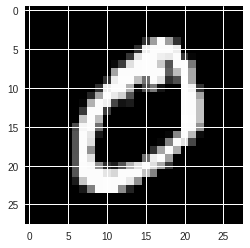

In [6]:
%matplotlib inline 
from matplotlib import pyplot as plt

plt.imshow(X_train[1].reshape(28,28),cmap='gray')

In [0]:
from keras.optimizers import SGD, Adam, RMSprop

model.compile(loss='categorical_crossentropy',
             optimizer = RMSprop(),
             metrics = ['accuracy'])

In [9]:
batch_size = 128
nb_epoch = 10

history = model.fit(X_train,Y_train,
                   batch_size = batch_size,
                   nb_epoch = nb_epoch,
                   verbose = 1,
                   validation_data=(X_test,Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.2215 - acc: 0.9318 - val_loss: 0.1178 - val_acc: 0.9606
Epoch 2/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0811 - acc: 0.9749 - val_loss: 0.0935 - val_acc: 0.9723
Epoch 3/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.0538 - acc: 0.9833 - val_loss: 0.0841 - val_acc: 0.9755
Epoch 4/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0404 - acc: 0.9875 - val_loss: 0.0840 - val_acc: 0.9777
Epoch 5/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0301 - acc: 0.9909 - val_loss: 0.0792 - val_acc: 0.9797
Epoch 6/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0226 - acc: 0.9929 - val_loss: 0.0899 - val_acc: 0.9812
Epoch 7/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.0197 - acc: 0.9941 - val_loss: 0.

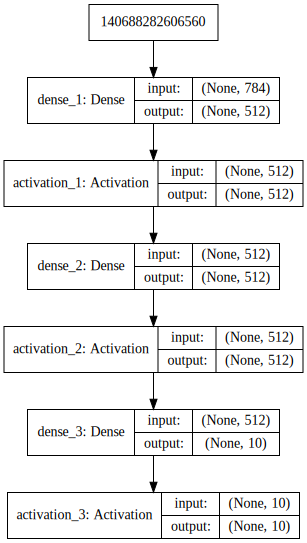

In [13]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot',format='svg'))

In [0]:
#note -- keras.utils.visualize_util renamed to keras.utils.vis_utils

#credits goes to - jfsantos
#this notebook is mainly for tutorial purpose 